# What happens to the placement of prime numbers in unfounded expressions?

## No.2 三次元空間にプロットしてみる

ここでは、**三角関数**、**円周率$\pi$**、**ネイピア数$e$**、**虚数**をテキトーに組み合わせて、三次元空間にプロットして遊びます。  
虚数をどう使うか？ですが･･･真剣に考えたトコで大したアイデアは出てこないので、例によって思い付きです（笑）。

※ 興味があればローカル環境で3Dグラフを回転させて観察してみて下さい。

## 素数生成用関数  

No.1ファイルと同じものです

In [1]:
import numpy as np

def choice_prime_num(arr):
    """Extract prime numbers"""
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

## まず、やってみる

まずは、No.1ファイルで使った渦巻きを使い回しつつ、虚数を空間上の"高さ"を表す値として使ってみます  
なお、ここからは、ローカル環境の処理能力の都合上、最大値を3,000としています）  

試しにz軸の大きさを $1- i^{n e}  \hspace{8px} (0 \leq n < 3000)$で得られた複素数の虚部の値としてみます。    
勿論、この操作は、単に高さに使う値を得る為にやっているだけで、虚部を使うことに**意味**はありません。  


### その１  

以下のセルが、描画用関数です。

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def z_value(num):
    z = []
    for n in num:
        imag = (1 - 1j ** (np.e * n)).imag
        z.append(imag)
    return z


def plot3d_01(int_range, prime, rad):
    theta = rad * int_range
    colors = []
    for num in range(len(int_range)):
        if num in prime:
            colors.append('red')
        elif num % 2 == 0:
            colors.append('darkslateblue')
        else:
            colors.append('mediumseagreen')

    x = int_range * np.cos(theta)
    y = int_range * np.sin(theta)
    z = z_value(int_range)

    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.set_facecolor('gray')
    ax.scatter(x, y, z, s=3,c=colors, alpha=0.8)
    plt.show()



まずは $rad = \frac{e \pi}{2}$  
(このセルを実行する前に、上のセルを実行しておいて下さい）

<IPython.core.display.Javascript object>


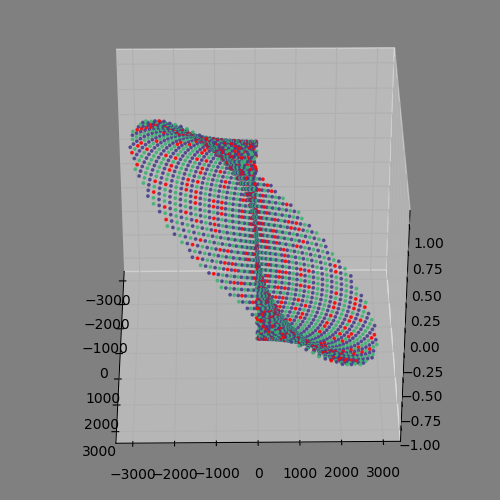

In [3]:
INT_RANGE = np.arange(0, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))
rad = (np.e/2) * np.pi

plot3d_01(INT_RANGE, PRIME_NUM, rad)

これはまた、なかなか面白い形が出現しました。  
...が、整数全体の配置は興味深いですが、素数の並び方に特に特徴はないようです。  
まぁ、（z軸方向からみると顕著ですが）渦巻き自体は使い回しで高さを与えただけなので、二次元が三次元になっただけというのが実際のところです。 

尚、$i^{e n}$の実部と虚部の値の挙動を図にすると以下のようになります$(-\frac{\pi}{2} \leq n < \frac{\pi}{2})$  
グラフの形としては、よく見慣れた形ですね


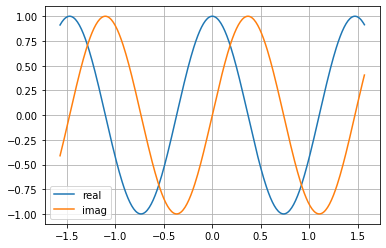

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

COMP_NUM = lambda n :1j ** (np.e * n)

def plot_2d(comp_num):
    num = np.arange(-np.pi/2, np.pi/2, 0.01)
    re = comp_num(num).real
    im = comp_num(num).imag
    plt.subplots()
    plt.plot(num, re, label="real")
    plt.plot(num, im, label="imag")
    plt.grid()
    plt.legend()
    plt.show()

plot_2d(COMP_NUM)

### その２  

$rad$の値を替えてみます $(rad = \frac{e^{2 \pi}}{2 \pi^{e}})$

<IPython.core.display.Javascript object>


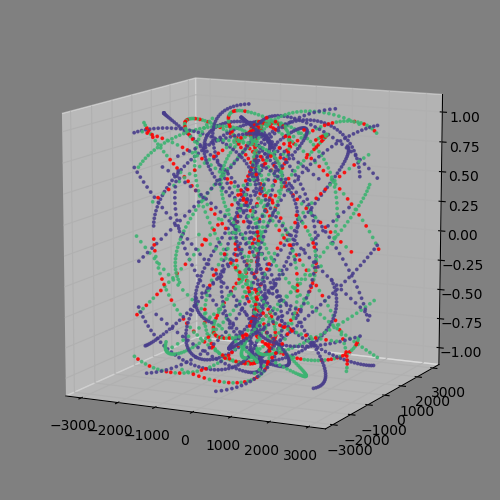

In [5]:
%matplotlib notebook
rad_6 = np.e**(2 * np.pi) / (2 * np.pi**np.e)

plot3d_01(INT_RANGE, PRIME_NUM, rad_6)

こりゃまた、見事にこんがらがっています。
ただ、こんがらがり過ぎていて、"繫がり"が一体どうなっているのか？･･･ちょっと追い切れません。

### その３  

次に $rad = \frac{2 \pi^{e}}{e^{-2 \pi}}$

<IPython.core.display.Javascript object>


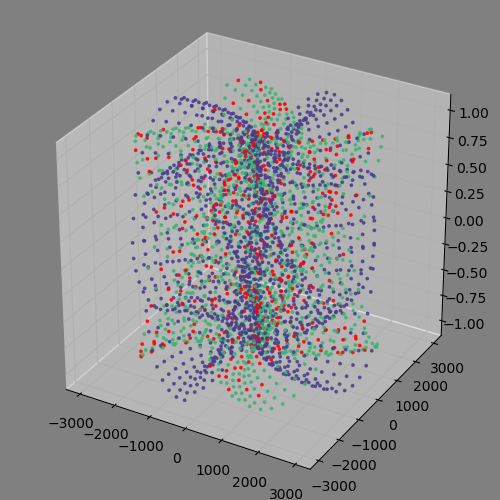

In [6]:
%matplotlib notebook

rad_0 = (2 * np.pi**np.e) / (np.e**(-2 * np.pi))

plot3d_01(INT_RANGE, PRIME_NUM, rad_0)

これも整数全体でみると面白いですが、素数の並びに法則性は無いように見えます。


No.1で使った他の$rad$パターンでは、多少気になる構造もあるようなのですが･･･ゴチャゴチャで何だかよく分かりません（苦笑）。  
これも他の形を考えて試してみると何か発見があるかも？  
興味があれば、以下のブロックで$rad$を切り替えて、あれこれ試して遊んでみて下さい

<IPython.core.display.Javascript object>


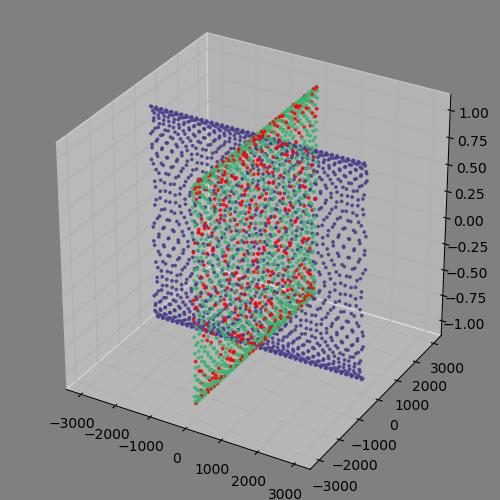

In [7]:
%matplotlib notebook

INT_RANGE = np.arange(0, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))

#rad_test = (np.pi**np.e) / (np.e**(-np.pi))
# rad_test = (2 * np.pi) / np.e**2
# rad_test = np.e / (2 * np.pi)
# rad_test = np.e**(np.pi) / (np.pi**np.e)
# rad_test = 2 / (np.e*np.pi)
# rad_test = np.exp(np.pi)
# rad_test = np.e**(-np.pi) / np.pi**np.e
# rad_test = np.pi**np.e
# rad_test = 2**np.e*np.pi
# rad_test = (2*np.e)**np.pi

## おまけ
rad_test = np.pi / 2

plot3d_01(INT_RANGE, PRIME_NUM, rad_test)

ちなみに、「その２」を6,000までの素数のみ表示とすると以下のようになります。

<IPython.core.display.Javascript object>


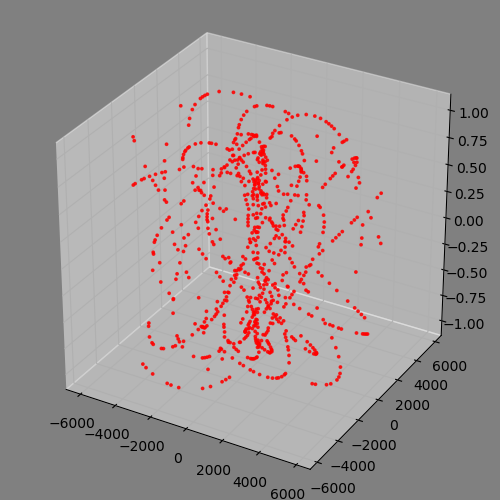

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Maximum number of integers to handle
INT_RANGE = np.arange(0, 6000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))

rad = (np.e/2) * np.pi

def z_value(num):
    z = []
    for n in num:
        imag = (1j ** (np.e * n)).imag
        z.append(imag)
    return z

def plot_prime(int_range, prime, rad):
    x = prime * np.cos(rad * prime)
    y = prime * np.sin(rad * prime)
    z = z_value(prime)

    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.set_facecolor('gray')
    ax.scatter(x, y, z, s=3,c="red", alpha=0.8)
  
    plt.show()

rad_6 = np.e**(2 * np.pi) / (2 * np.pi**np.e)
plot_prime(INT_RANGE, PRIME_NUM, rad_6)


う〜ん･･･分からん（苦笑）  

以降のファイルでは回転を組み合わせてみます
